### custom model learning

*   CNN, Vgg16 model


In [1]:
import torch
from torch.utils.data import DataLoader

import cnn_multi_class_func as cnn


In [2]:
train_dataset, test_dataset, val_dataset = cnn.make_dataset_cpu()


In [3]:
train_dataset.dataset[1]


(tensor([[[-0.6863, -0.7333, -0.8275,  ..., -0.0588, -1.0000, -1.0000],
          [-0.1137, -0.2627, -0.4980,  ...,  0.0118, -1.0000, -1.0000],
          [-0.4510, -0.6157, -0.6706,  ...,  0.0510, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000, -0.1608,  ...,  0.6235,  0.6078,  0.6000],
          [-1.0000, -1.0000, -0.1451,  ...,  0.6078,  0.5843,  0.5765],
          [-1.0000, -1.0000, -0.1373,  ..., -0.5137, -0.5137, -0.5216]],
 
         [[-0.6706, -0.7098, -0.8039,  ..., -0.0745, -1.0000, -1.0000],
          [-0.0510, -0.1922, -0.4118,  ...,  0.0039, -1.0000, -1.0000],
          [-0.3882, -0.5451, -0.5843,  ...,  0.0431, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000, -0.1373,  ...,  0.2784,  0.2392,  0.2157],
          [-1.0000, -1.0000, -0.1216,  ...,  0.3020,  0.2627,  0.2314],
          [-1.0000, -1.0000, -0.1137,  ..., -0.6000, -0.6157, -0.6157]],
 
         [[-0.6471, -0.6784, -0.7725,  ..., -0.0431, -1.0000, -1.0000],
          [ 0.0353, -0.0980,

In [4]:
print(f"train_dataset: {len(train_dataset)}")
print(f"val_dataset: {len(val_dataset)}")
print(f"test_dataset: {len(test_dataset)}")


train_dataset: 21204
val_dataset: 2357
test_dataset: 2618


In [5]:
vgg_model = cnn.CustomVgg16MCModel()


In [6]:
print(vgg_model)
cnn.summary(vgg_model)


CustomVgg16MCModel(
  (vgg16): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
 

Layer (type:depth-idx)                   Param #
CustomVgg16MCModel                       --
├─VGG: 1-1                               --
│    └─Sequential: 2-1                   --
│    │    └─Conv2d: 3-1                  1,792
│    │    └─ReLU: 3-2                    --
│    │    └─Conv2d: 3-3                  36,928
│    │    └─ReLU: 3-4                    --
│    │    └─MaxPool2d: 3-5               --
│    │    └─Conv2d: 3-6                  73,856
│    │    └─ReLU: 3-7                    --
│    │    └─Conv2d: 3-8                  147,584
│    │    └─ReLU: 3-9                    --
│    │    └─MaxPool2d: 3-10              --
│    │    └─Conv2d: 3-11                 295,168
│    │    └─ReLU: 3-12                   --
│    │    └─Conv2d: 3-13                 590,080
│    │    └─ReLU: 3-14                   --
│    │    └─Conv2d: 3-15                 590,080
│    │    └─ReLU: 3-16                   --
│    │    └─MaxPool2d: 3-17              --
│    │    └─Conv2d: 3-18                

In [7]:
for named, params in vgg_model.named_parameters():
    print(f"[{named}] - {params.shape}")
    params.requires_grad = False


[vgg16.features.0.weight] - torch.Size([64, 3, 3, 3])
[vgg16.features.0.bias] - torch.Size([64])
[vgg16.features.2.weight] - torch.Size([64, 64, 3, 3])
[vgg16.features.2.bias] - torch.Size([64])
[vgg16.features.5.weight] - torch.Size([128, 64, 3, 3])
[vgg16.features.5.bias] - torch.Size([128])
[vgg16.features.7.weight] - torch.Size([128, 128, 3, 3])
[vgg16.features.7.bias] - torch.Size([128])
[vgg16.features.10.weight] - torch.Size([256, 128, 3, 3])
[vgg16.features.10.bias] - torch.Size([256])
[vgg16.features.12.weight] - torch.Size([256, 256, 3, 3])
[vgg16.features.12.bias] - torch.Size([256])
[vgg16.features.14.weight] - torch.Size([256, 256, 3, 3])
[vgg16.features.14.bias] - torch.Size([256])
[vgg16.features.17.weight] - torch.Size([512, 256, 3, 3])
[vgg16.features.17.bias] - torch.Size([512])
[vgg16.features.19.weight] - torch.Size([512, 512, 3, 3])
[vgg16.features.19.bias] - torch.Size([512])
[vgg16.features.21.weight] - torch.Size([512, 512, 3, 3])
[vgg16.features.21.bias] - torc

In [8]:
vgg_model.custom_layer


Sequential(
  (0): ReLU()
  (1): Linear(in_features=1000, out_features=500, bias=True)
  (2): ReLU()
  (3): Linear(in_features=500, out_features=50, bias=True)
  (4): ReLU()
  (5): Linear(in_features=50, out_features=10, bias=True)
)

In [9]:
for named, params in vgg_model.custom_layer.named_parameters():
    print(f"[{named}] - {params.shape}")
    params.requires_grad = True


[1.weight] - torch.Size([500, 1000])
[1.bias] - torch.Size([500])
[3.weight] - torch.Size([50, 500])
[3.bias] - torch.Size([50])
[5.weight] - torch.Size([10, 50])
[5.bias] - torch.Size([10])


In [10]:
loss_dict, acc_dict, f1_dict = cnn.training(
    vgg_model.to(cnn.DEVICE), train_dataset, val_dataset
)


saved first
[    1/  100]  [Train]       loss: 0.529903, score: 78.1517 %
[    1/  100]  [Validation]  loss: 0.416385, score: 85.6870 %

[    2/  100]  saved model
[    2/  100]  [Train]       loss: 0.425838, score: 82.1833 %
[    2/  100]  [Validation]  loss: 0.407430, score: 85.7846 %

[    3/  100]  saved model
[    3/  100]  [Train]       loss: 0.400661, score: 83.3883 %
[    3/  100]  [Validation]  loss: 0.375731, score: 87.9894 %

---check point---
[    5/  100]  [Train]       loss: 0.371820, score: 84.3318 %
[    5/  100]  [Validation]  loss: 0.347422, score: 87.9704 %

---check point---
[   10/  100]  [Train]       loss: 0.318398, score: 86.9526 %
[   10/  100]  [Validation]  loss: 0.364992, score: 88.2143 %

[   10/  100]  saved model
[   10/  100]  [Train]       loss: 0.318398, score: 86.9526 %
[   10/  100]  [Validation]  loss: 0.364992, score: 88.2143 %

[   11/  100]  saved model
[   11/  100]  [Train]       loss: 0.316971, score: 86.7468 %
[   11/  100]  [Validation]  los

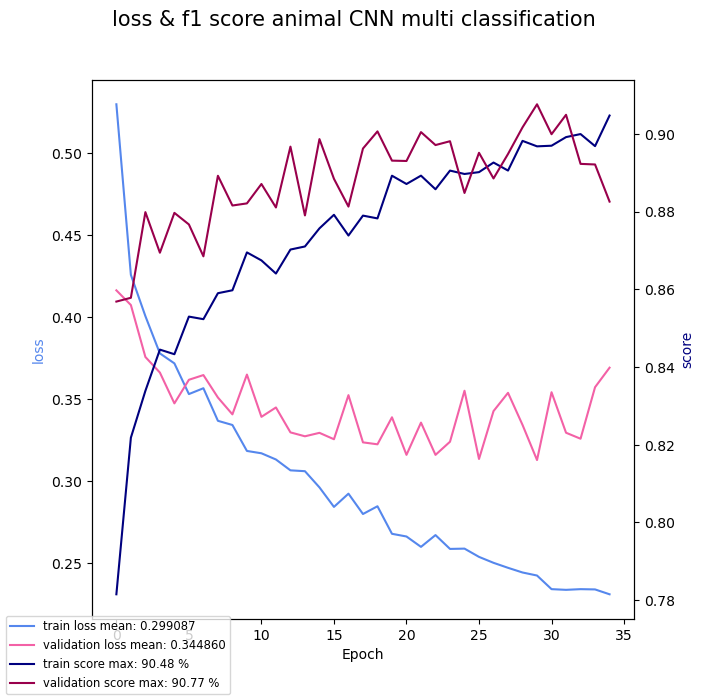

In [15]:
cnn.draw_two_plot(loss_dict, f1_dict, "loss & f1 score")


In [16]:
import seaborn as sns


In [34]:
test_dataset.dataset[0][1]


0

In [49]:
test_dl = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)


In [50]:
for images, lables in test_dl:
    test_imgs, test_labels = images, lables


In [60]:
vgg_model = torch.load("./model/CNN_mc_custom_clf_model.pth")


test_loss: 0.229124
test_acc: 89.379028 %
test_f1: 89.690796 %


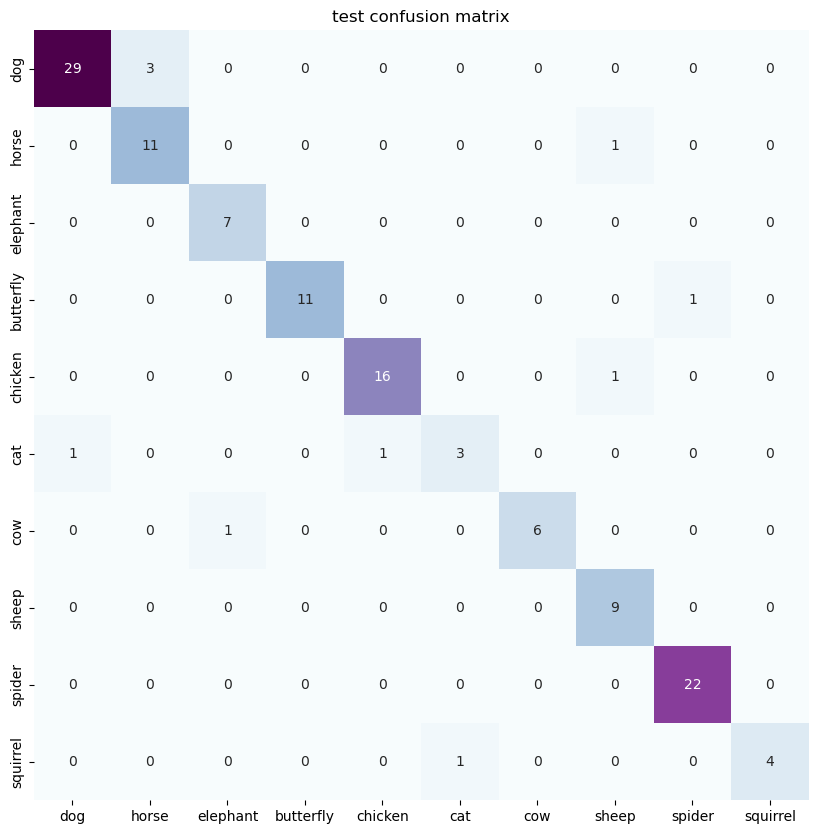

test_loss: 0.295479
test_acc: 88.406349 %
test_f1: 88.332787 %


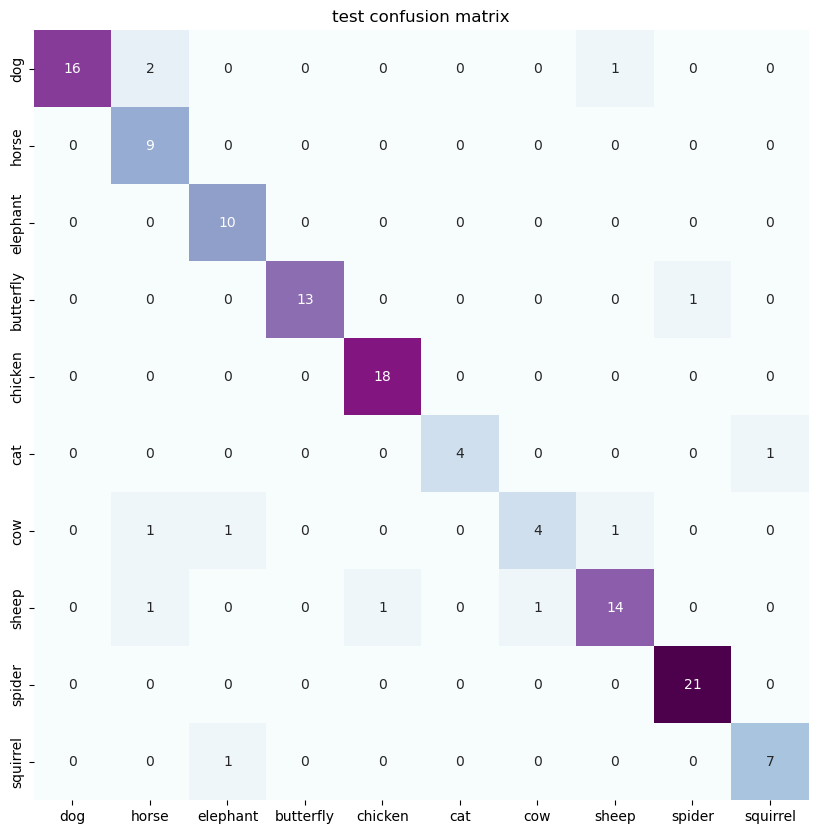

test_loss: 0.208154
test_acc: 93.768562 %
test_f1: 90.179390 %


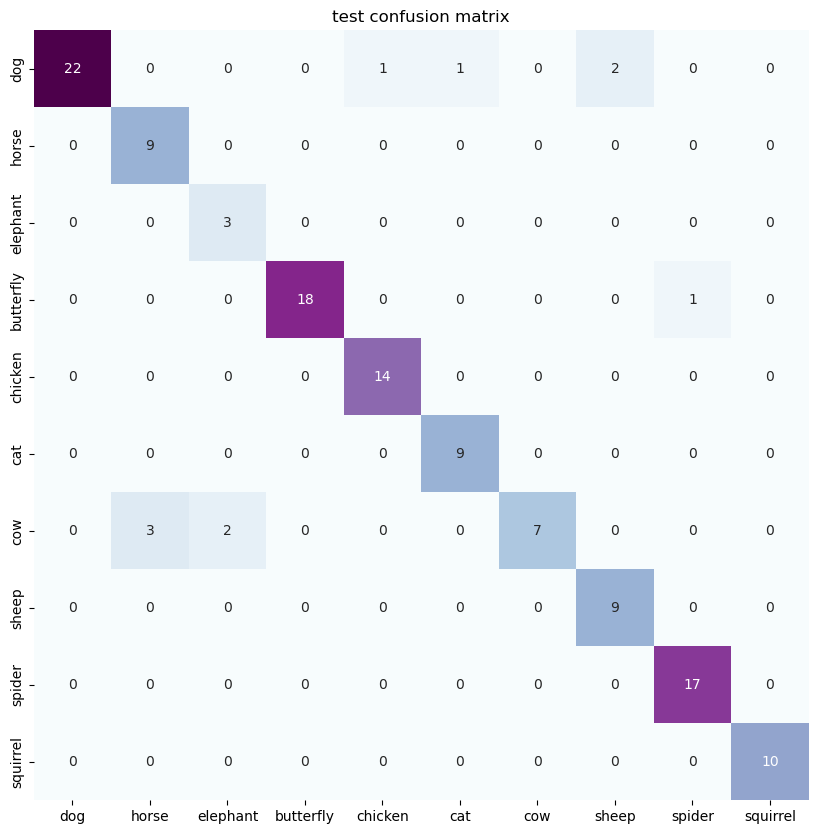

test_loss: 0.299729
test_acc: 92.008553 %
test_f1: 90.899124 %


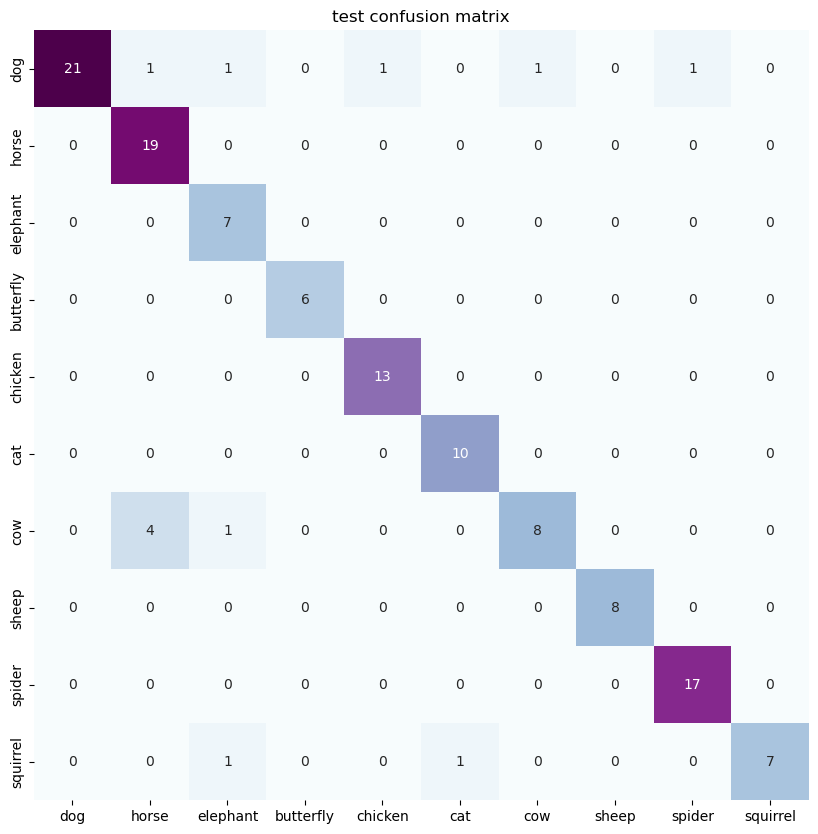

test_loss: 0.233327
test_acc: 91.656723 %
test_f1: 92.498344 %


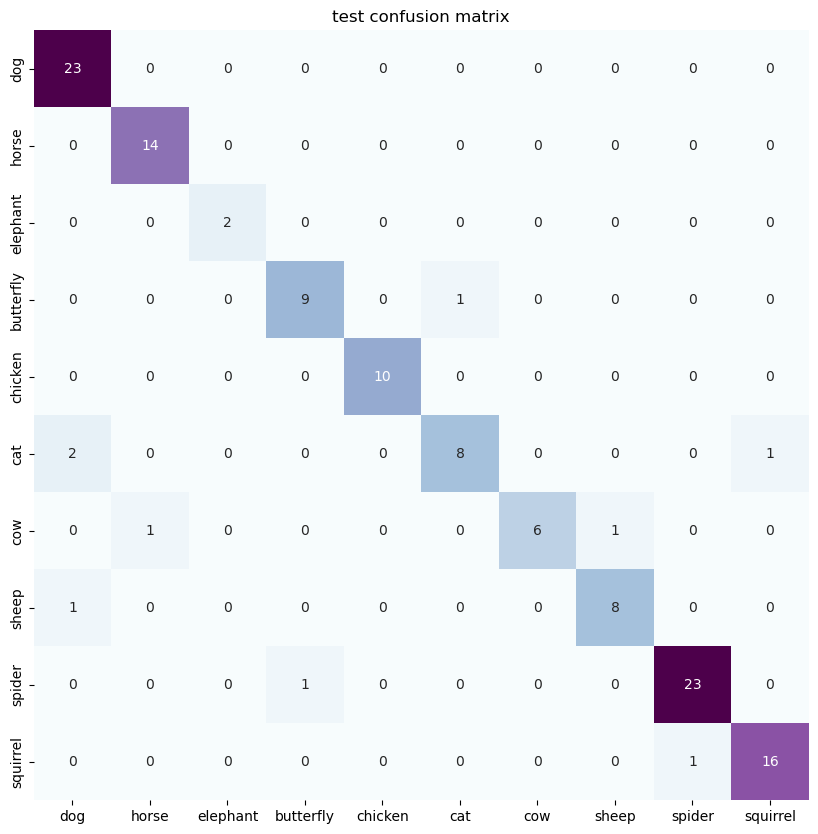

test_loss: 0.439808
test_acc: 83.846153 %
test_f1: 82.560692 %


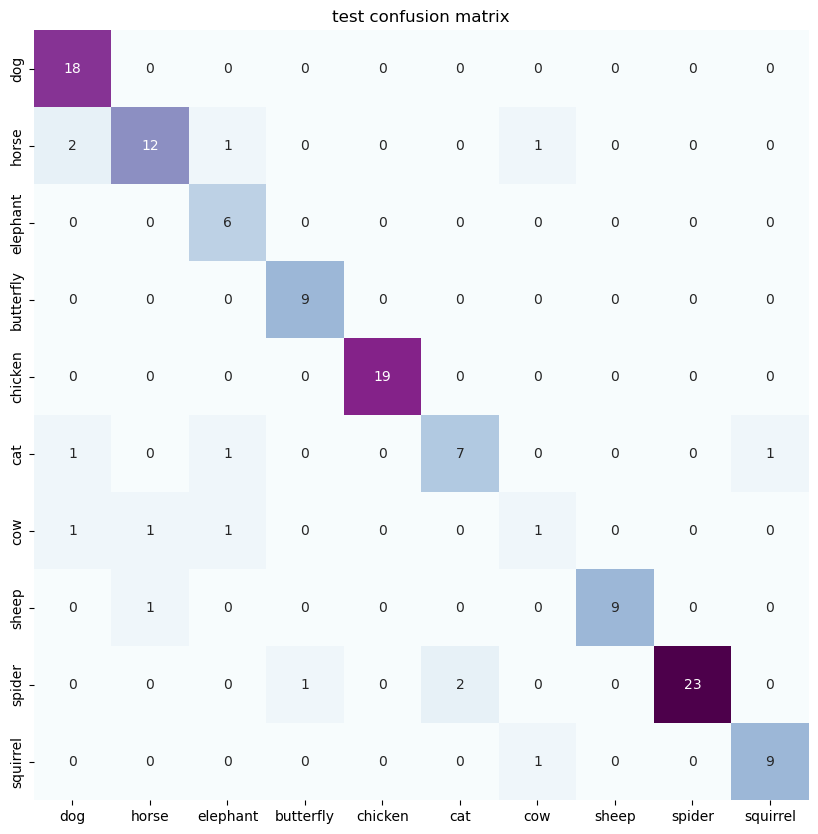

test_loss: 0.294725
test_acc: 91.143097 %
test_f1: 88.924843 %


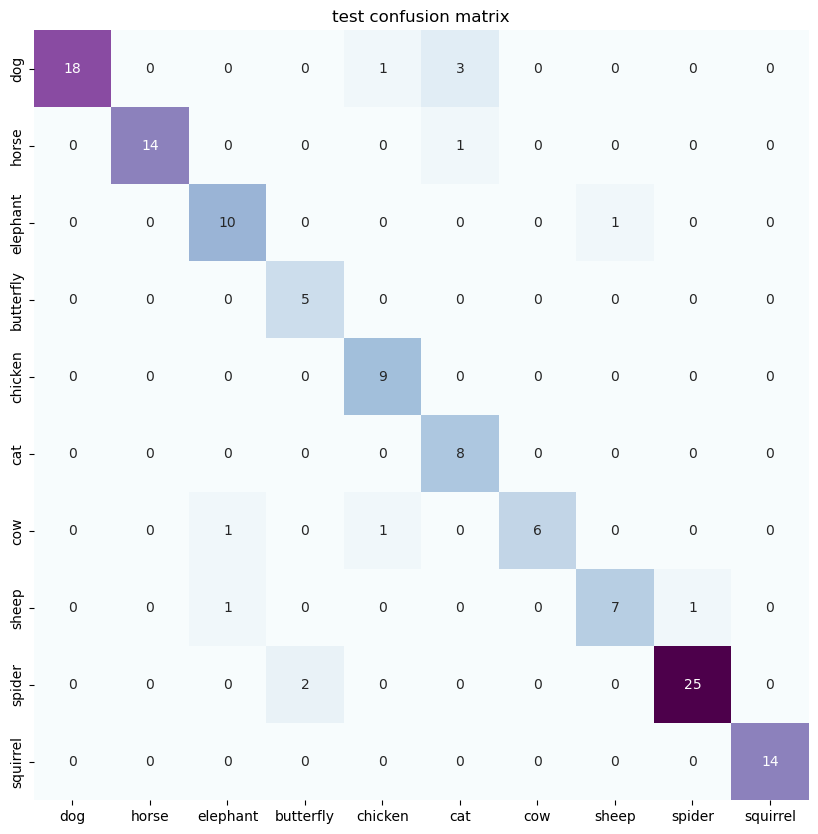

test_loss: 0.432019
test_acc: 89.225471 %
test_f1: 88.501892 %


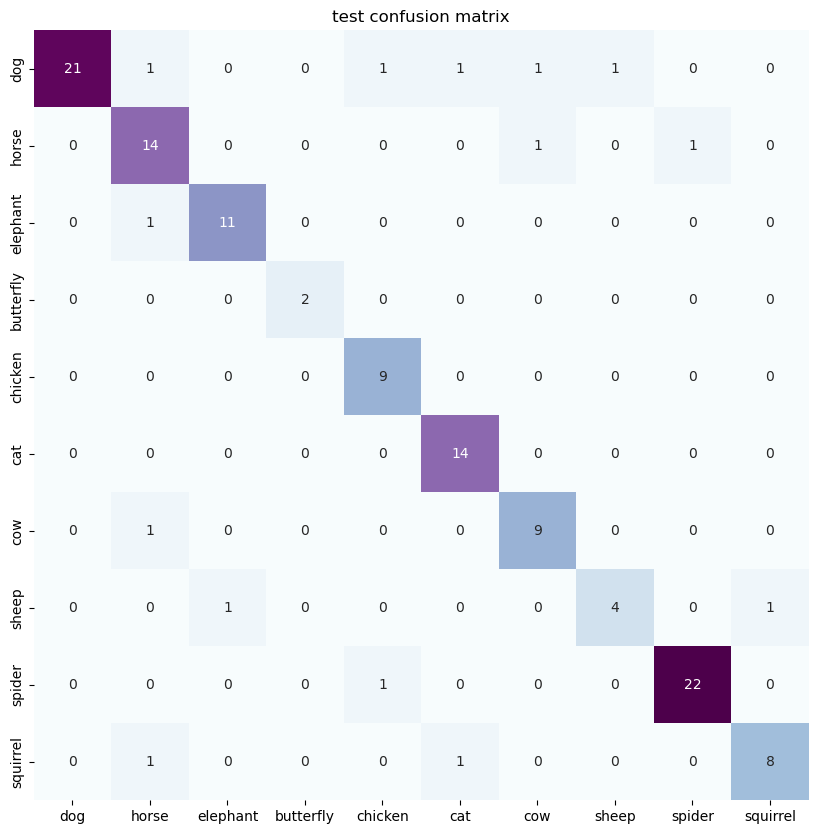

test_loss: 0.322183
test_acc: 87.958870 %
test_f1: 87.055916 %


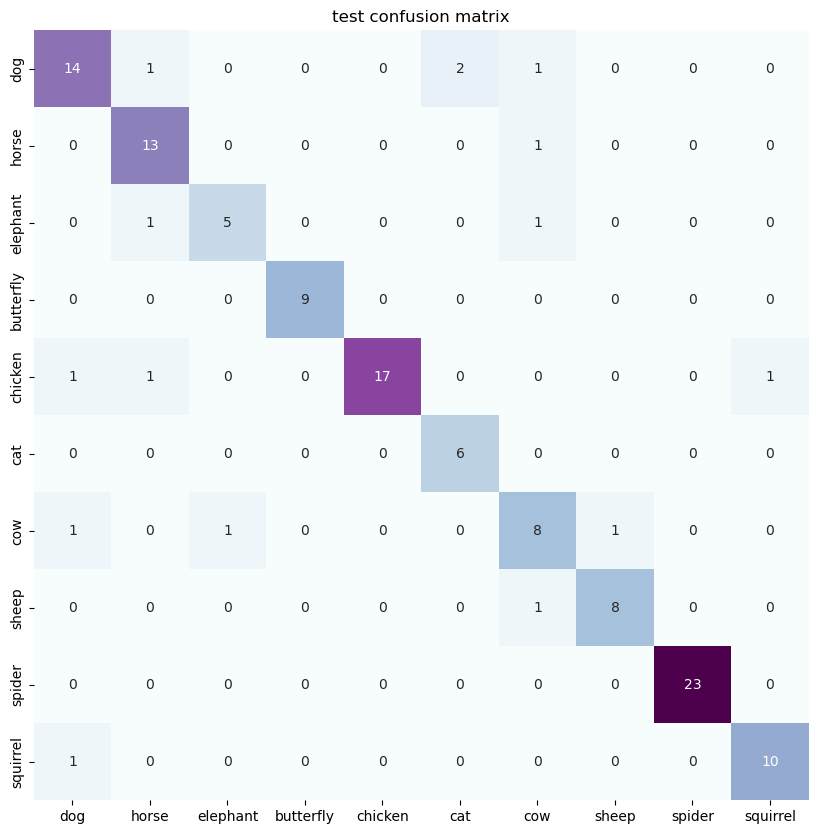

test_loss: 0.579940
test_acc: 84.957161 %
test_f1: 86.363167 %


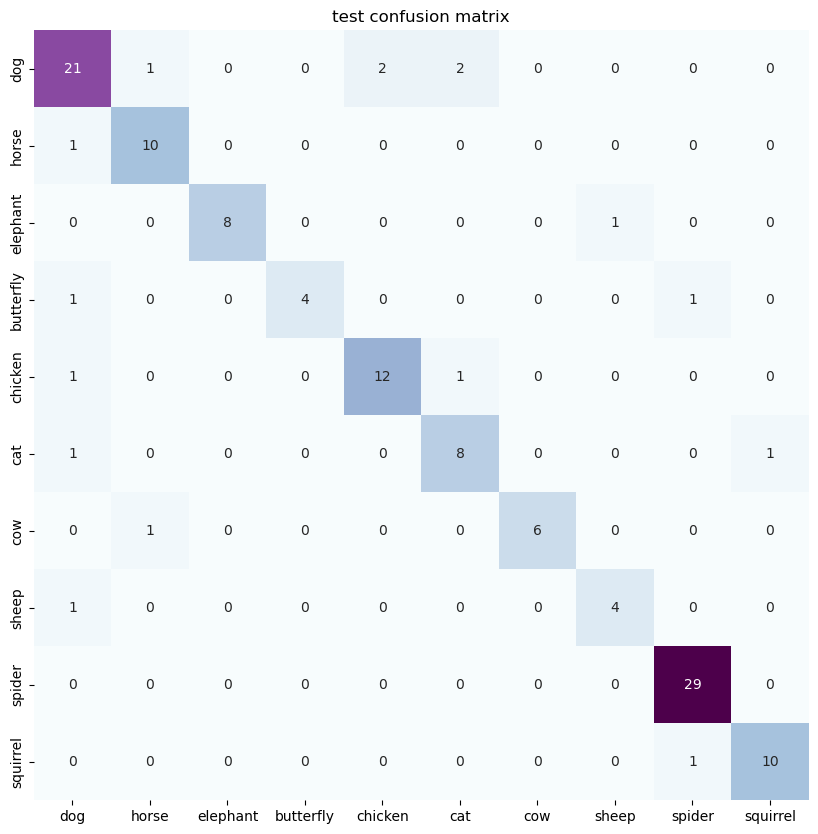

test_loss: 0.285134
test_acc: 94.043556 %
test_f1: 91.882553 %


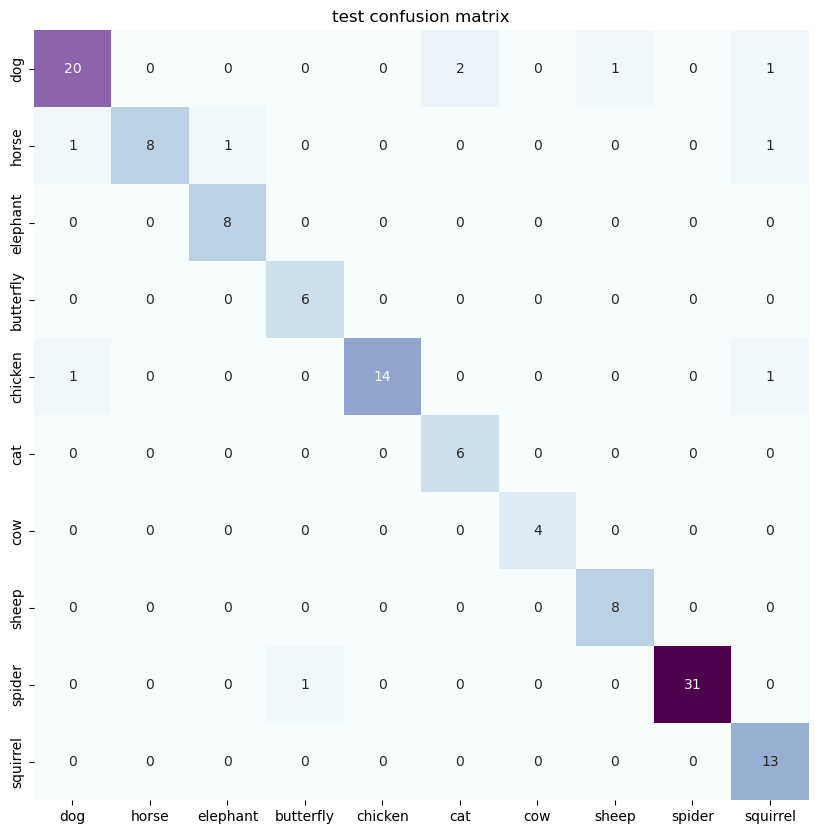

test_loss: 0.317386
test_acc: 91.768867 %
test_f1: 90.465172 %


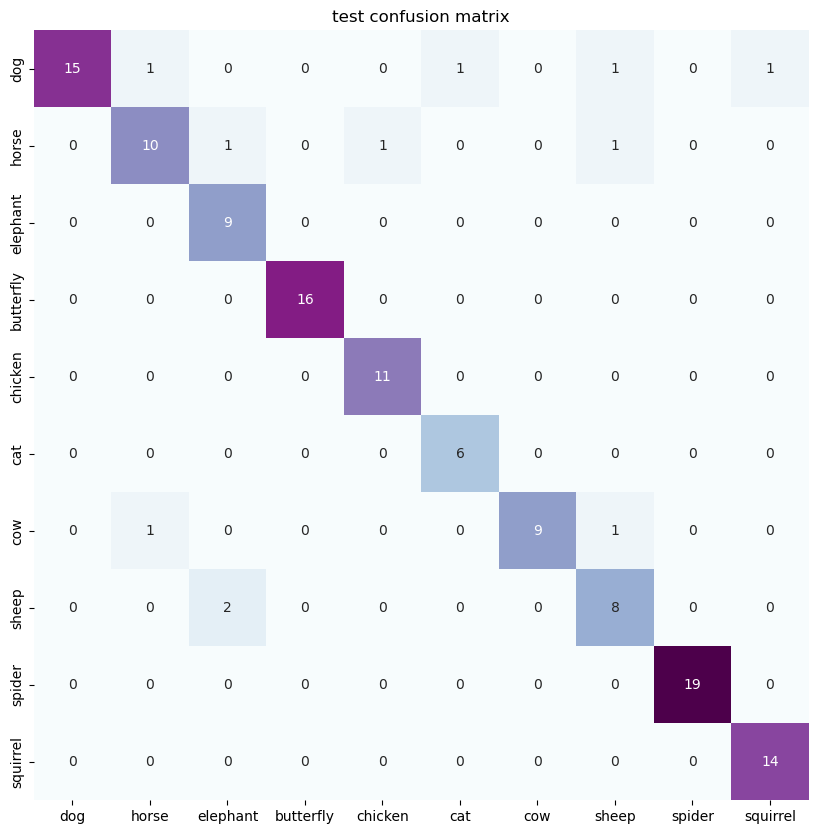

test_loss: 0.357925
test_acc: 89.312996 %
test_f1: 88.234962 %


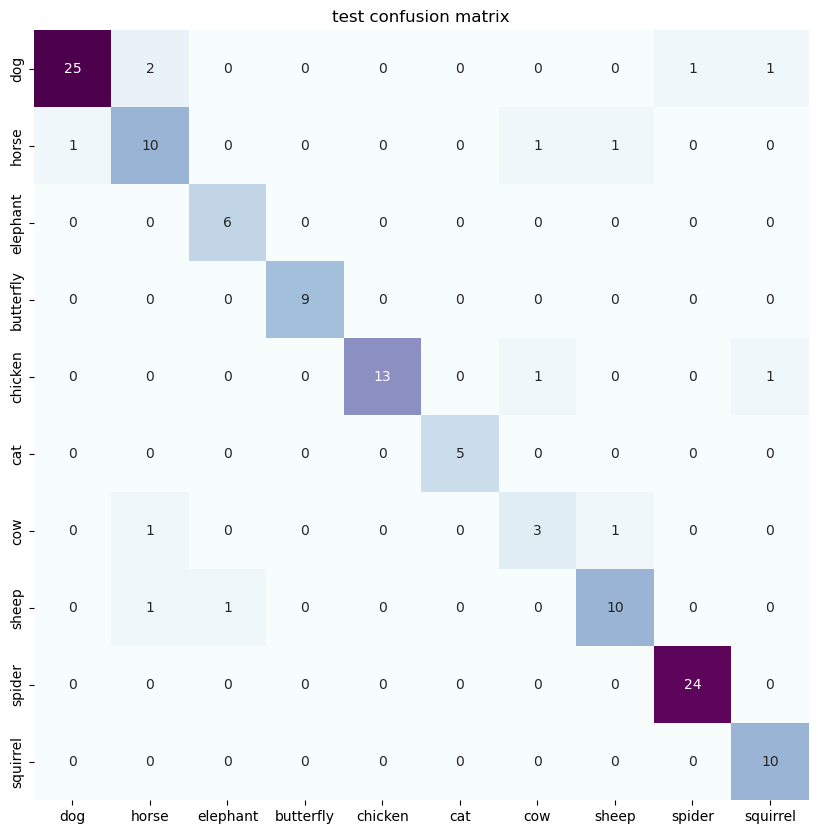

test_loss: 0.144970
test_acc: 94.596954 %
test_f1: 92.824318 %


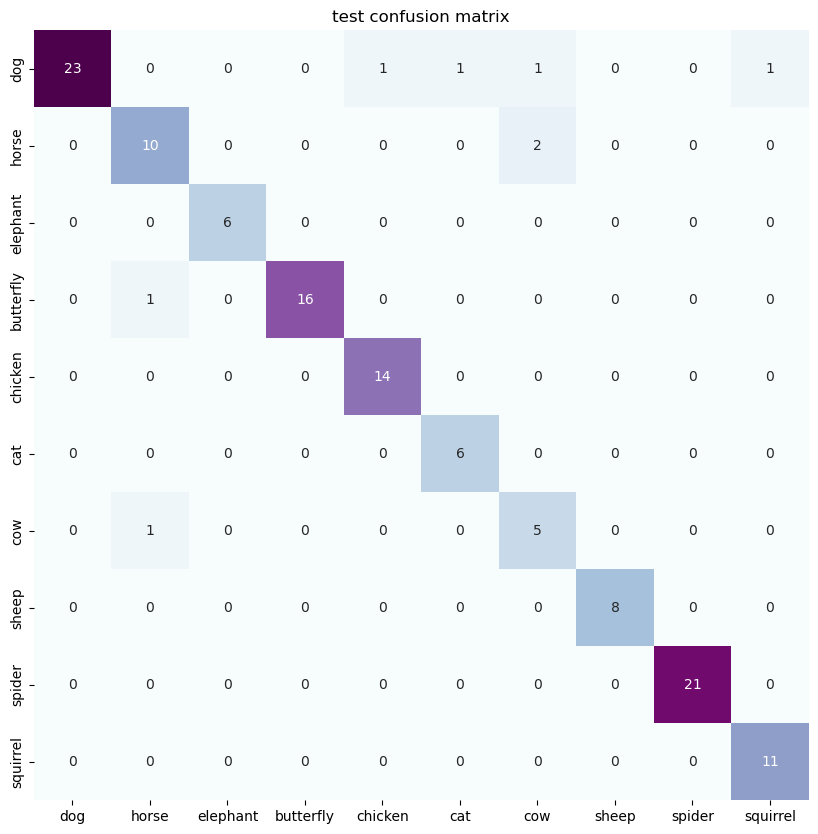

test_loss: 0.382410
test_acc: 90.824677 %
test_f1: 88.152672 %


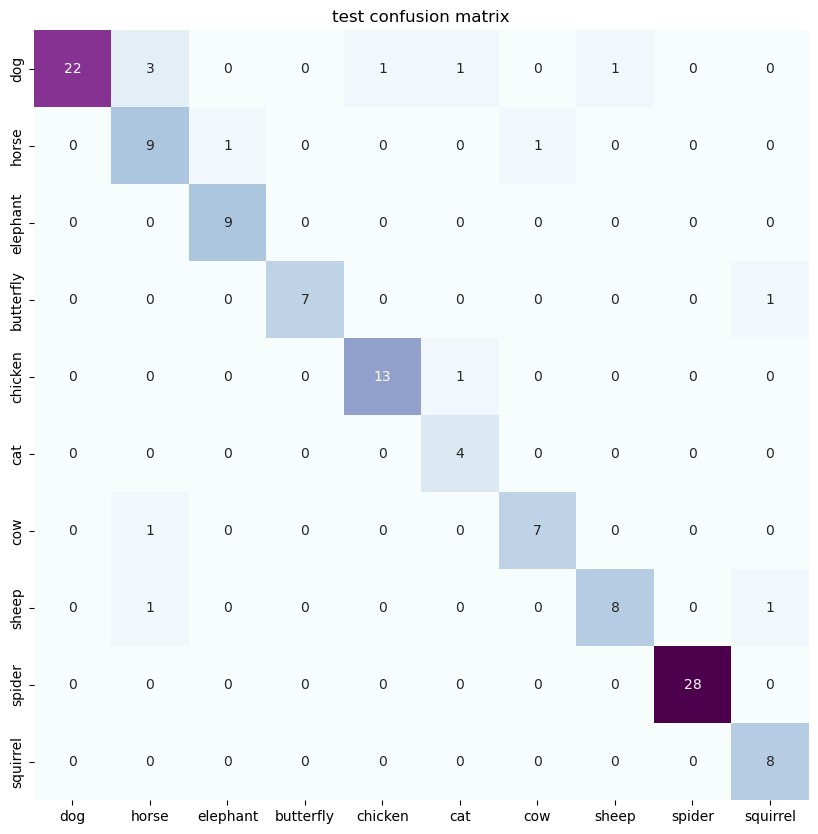

test_loss: 0.562240
test_acc: 86.402115 %
test_f1: 85.134956 %


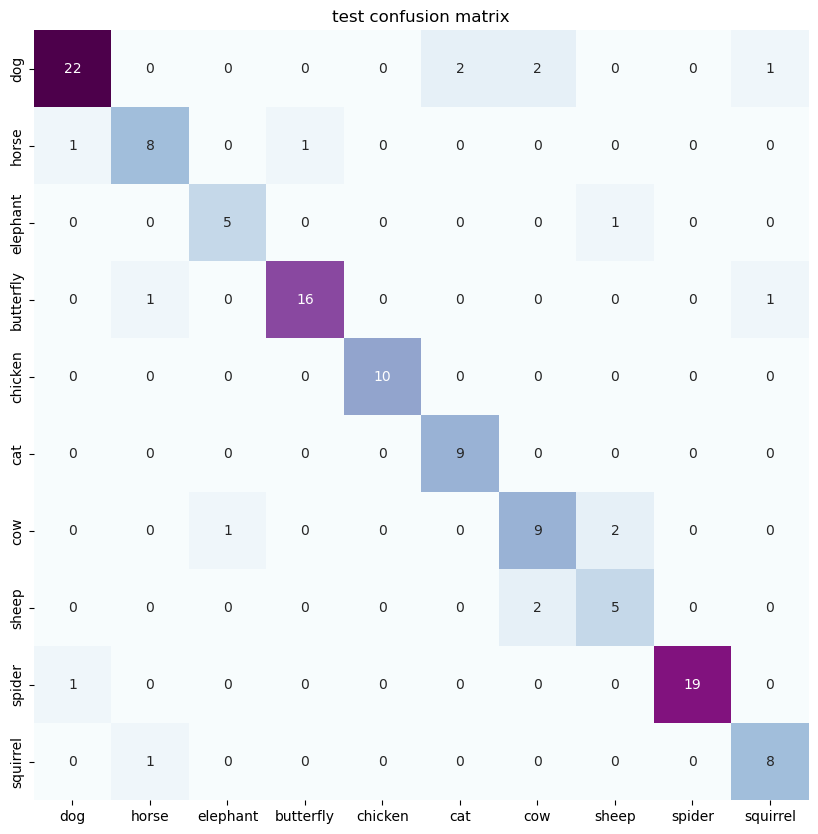

test_loss: 0.301922
test_acc: 91.641258 %
test_f1: 90.085968 %


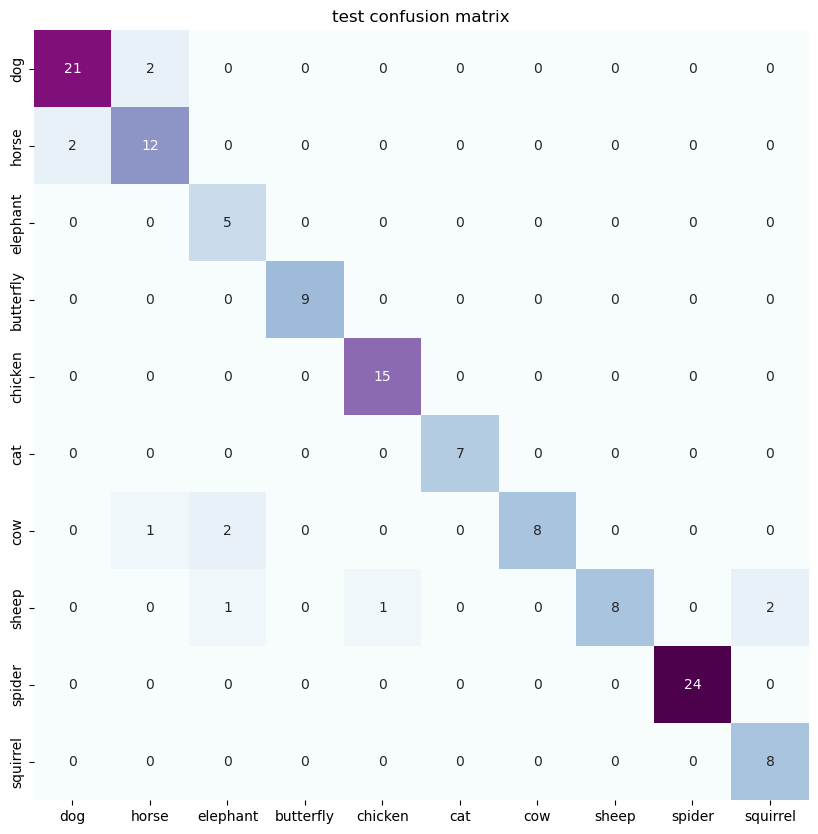

test_loss: 0.205410
test_acc: 92.107933 %
test_f1: 91.259850 %


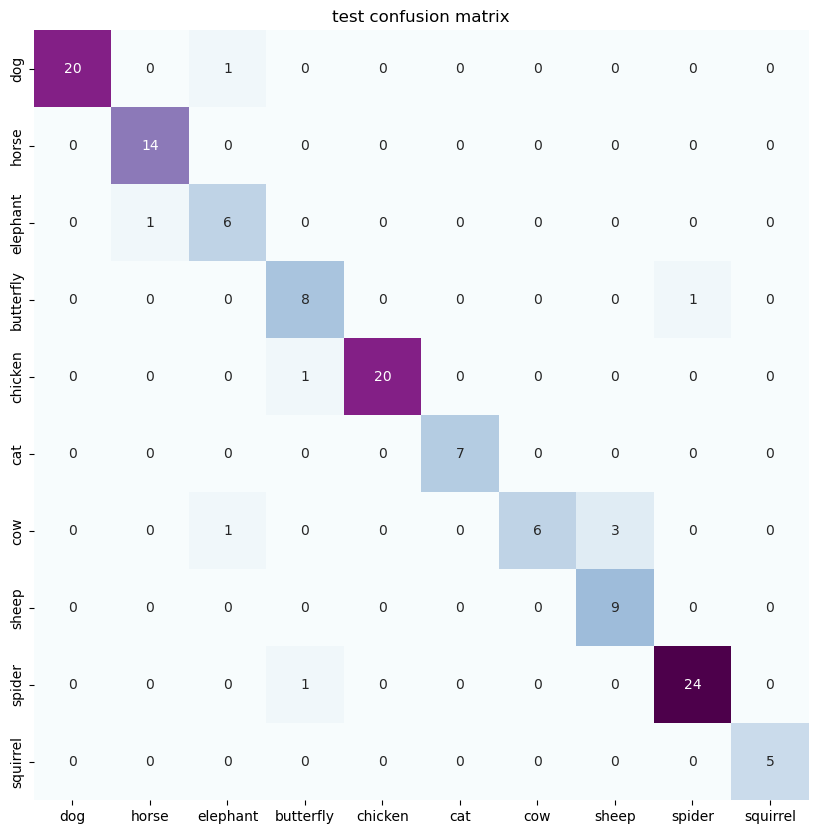

test_loss: 0.277085
test_acc: 91.773293 %
test_f1: 88.488853 %


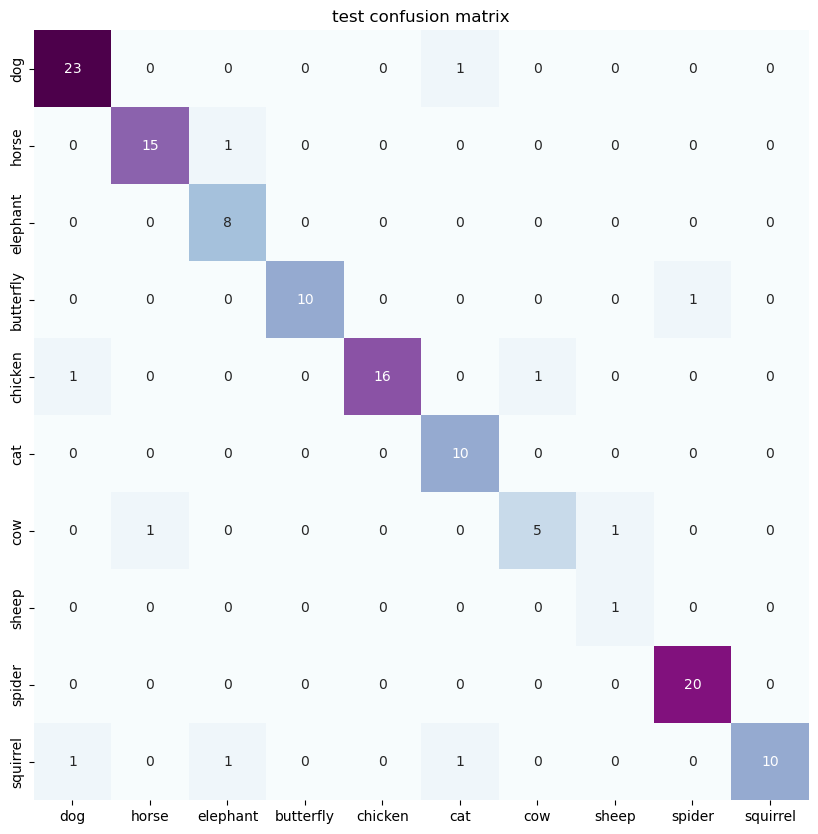

test_loss: 0.295787
test_acc: 87.993797 %
test_f1: 87.917343 %


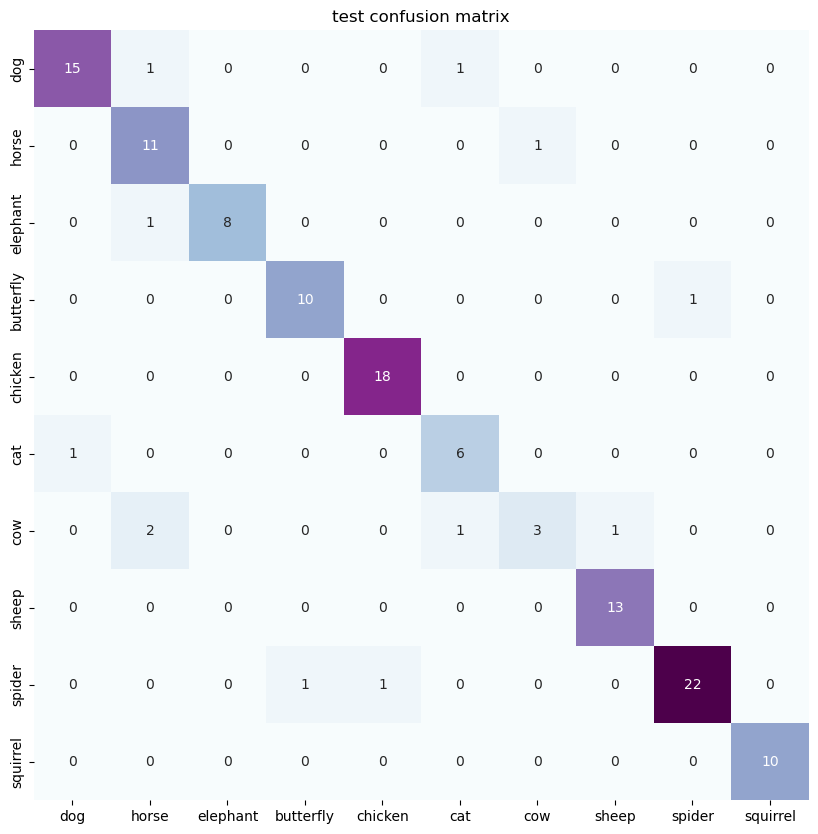

total loss: 0.323238
total acc: 90.140771 %
total f1: 88.972679 %


In [65]:
test_dl = DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=True)

loss, acc, f1 = [], [], []

for images, lables in test_dl:
    test_imgs, test_labels = images, lables

    test_loss, test_acc, test_f1, test_mat = cnn.testing(
        vgg_model, test_imgs.to(cnn.DEVICE), test_labels.to(cnn.DEVICE)
    )

    print(f"test_loss: {test_loss:.6f}")
    print(f"test_acc: {test_acc*100:.6f} %")
    print(f"test_f1: {test_f1*100:.6f} %")

    loss.append(test_loss.item())
    acc.append(test_acc.item())
    f1.append(test_f1.item())

    translate = {
        0: "dog",
        1: "horse",
        2: "elephant",
        3: "butterfly",
        4: "chicken",
        5: "cat",
        6: "cow",
        7: "sheep",
        8: "spider",
        9: "squirrel",
    }

    test_mat_cpu = test_mat.cpu().numpy()

    cnn.plt.figure(figsize=(10, 10))
    sns.heatmap(test_mat_cpu, annot=True, fmt=".0f", cmap="BuPu", cbar=False)
    cnn.plt.title("test confusion matrix")
    cnn.plt.xticks(cnn.np.arange(10) + 0.5, labels=[translate[i] for i in range(10)])
    cnn.plt.yticks(cnn.np.arange(10) + 0.5, labels=[translate[i] for i in range(10)])

    cnn.plt.show()

print(f"total loss: {cnn.np.mean(loss):.6f}")
print(f"total acc: {cnn.np.mean(acc)*100:.6f} %")
print(f"total f1: {cnn.np.mean(f1)*100:.6f} %")
